Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 133.7849177365628
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5
Fitted line: C0 = 3.6365394792863133, C1 = 4.2987855073478025


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

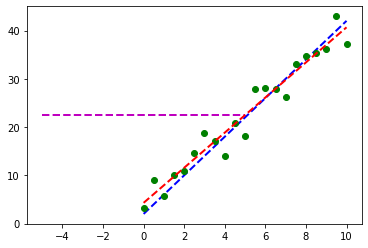

In [26]:
"""Fit a line to data points"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as spo
    
def error(line, data):  # error function
    # Compute error between given line model and observed data
    # line: tuple/list/array (C0,C1) where C0 is slope and C1 is Y-intercept
    # data: 2D array where each row is a point (x,y)
    # Metric: sum of squared Y-axis differences
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1])) ** 2)

    
    
    
    
    
    return err

def fit_line(data, error_func):
    # Fit a line to given data, using a supplied error function
    # data: 2D array where each row is a point (X0, Y)
    # error_func: mismatch function
    
    
    
    
    
    
    # Generate initial guess for line model
    l = np.float32([0, np.mean(data[:,1])])  # slope=0, intercept = mean(y values)

    # Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label='Initial guess')

   # Call optimiser to minimise error function
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp':True})
    return result.x

def test_run():
    # Define original line
    l_orig = np.float32([4,2])  # line with C0=4 (m) and C1=2 (b)
    print('Original line: C0 = {}, C1 = {}'.format(l_orig[0], l_orig[1]))
    Xorig = np.linspace(0, 10, 21)  # evenly spaced samples (start,stop,number)
    Yorig = l_orig[0] * Xorig + l_orig[1]
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label='Original line')   
    
    # Generate noisy data points
    noise_sigma = 3.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:,0], data[:,1], 'go', label='Data points')
    
    # Try to fit a line to this data
    l_fit = fit_line(data, error)
    print('Fitted line: C0 = {}, C1 = {}'.format(l_fit[0], l_fit[1]))
    plt.plot(data[:,0], l_fit[0] * data[:,0] + l_fit[1], 'r--', linewidth=2.0, label='Fitted line')
    
    # Add a legend and show plot
    plt.legend(loc='upper left')
    

    

    
 
    
    
if __name__ == "__main__":  # if run standalone
    test_run()


